In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import s3fs

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('s3://bass-risk-monitoring/Bronze/HI-Medium_Trans.csv') # ("../data/Bronze/HI-Medium_Trans.csv")


In [3]:
df.shape

(31898238, 11)

In [4]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ GB


In [ ]:
# Convert data types to save memory
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df["Account"]   = df["Account"].astype("string")
df["Account.1"] = df["Account.1"].astype("string")

df["From Bank"] = pd.to_numeric(df["From Bank"], downcast="integer")
df["To Bank"]   = pd.to_numeric(df["To Bank"], downcast="integer")

df["Amount Paid"]     = pd.to_numeric(df["Amount Paid"], downcast="float")
df["Amount Received"] = pd.to_numeric(df["Amount Received"], downcast="float")

# Categorical vars
df["Payment Currency"]   = df["Payment Currency"].astype("category")
df["Receiving Currency"] = df["Receiving Currency"].astype("category")
df["Payment Format"]     = df["Payment Format"].astype("category")

df["Is Laundering"] = df["Is Laundering"].astype("int8")

print(df.dtypes)



Timestamp             datetime64[ns]
From Bank                      int32
Account               string[python]
To Bank                        int32
Account.1             string[python]
Amount Received              float64
Receiving Currency          category
Amount Paid                  float64
Payment Currency            category
Payment Format              category
Is Laundering                   int8
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int32         
 2   Account             string        
 3   To Bank             int32         
 4   Account.1           string        
 5   Amount Received     float64       
 6   Receiving Currency  category      
 7   Amount Paid         float64       
 8   Payment Currency    category      
 9   Payment Format      category      
 10  Is Laundering       int8          
dtypes: category(3), datetime64[ns](1), float64(2), int32(2), int8(1), string(2)
memory usage: 1.5 GB


In [48]:
print("Date range:", df['Timestamp'].min(), "-", df['Timestamp'].max())

Date range: 2022-09-01 00:00:00 - 2022-09-28 15:58:00


#### Insights
- Timestamp is  stored as datetime64.

- Accounts remain as object  since they are alphanumeric IDs.

- Currencies & Payment Format now category,  efficient for grouping & filtering.

- Memory usage dropped from 2.6 GB to 1.5 GB just from type conversion (around 40% reduction).

Dataset is now  correct schema and clean for the next phase.

#### Next
- check for duplicates, integrity, and ID consistency

In [50]:
dup_rows_total = df.duplicated().sum()
print("Exact duplicate rows:", dup_rows_total)

Exact duplicate rows: 20


In [51]:
duplicate_rows = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
duplicate_rows


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
8159369,2022-09-03 18:39:00,122407,80E54B721,213589,84EC258A1,0.000002,Bitcoin,0.000002,Bitcoin,Bitcoin,0
8159371,2022-09-03 18:39:00,122407,80E54B721,213589,84EC258A1,0.000002,Bitcoin,0.000002,Bitcoin,Bitcoin,0
9834991,2022-09-05 07:36:00,161430,828C83141,161430,828C83140,0.000001,Bitcoin,0.010000,US Dollar,ACH,0
9834993,2022-09-05 07:36:00,161430,828C83141,161430,828C83140,0.000001,Bitcoin,0.010000,US Dollar,ACH,0
9834992,2022-09-05 07:36:00,161430,828C83141,2213875,851BB5C81,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
9834994,2022-09-05 07:36:00,161430,828C83141,2213875,851BB5C81,0.000001,Bitcoin,0.000001,Bitcoin,Bitcoin,0
13710705,2022-09-07 08:15:00,2597,800AB57E0,2597,800AB57E0,0.050000,Euro,0.060000,US Dollar,ACH,0
13710707,2022-09-07 08:15:00,2597,800AB57E0,2597,800AB57E0,0.050000,Euro,0.060000,US Dollar,ACH,0
15819700,2022-09-08 10:14:00,1313,817576F91,1313,817576F90,0.000001,Bitcoin,0.010000,US Dollar,ACH,0
15819702,2022-09-08 10:14:00,1313,817576F91,1313,817576F90,0.000001,Bitcoin,0.010000,US Dollar,ACH,0


In [52]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

#### Insights
- Duplicates removed: only 20 rows dropped out of 31M,  negligible in size, but important to avoid bias in training.

#### Next: 
- check for nulls and  negative values,

- validate Amount Paid vs Amount Received logic.

- Amount Paid vs Amount Received to flag inconsistencies.

In [9]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [11]:
neg_paid = (df['Amount Paid'] <= 0).sum()
neg_recv = (df['Amount Received'] <= 0).sum()
print("Non-positive Amount Paid:", neg_paid)
print("Non-positive Amount Received:", neg_recv)

Non-positive Amount Paid: 0
Non-positive Amount Received: 0


In [12]:
print("Amount Paid - min/max:", df['Amount Paid'].min(), df['Amount Paid'].max())
print("Amount Received - min/max:", df['Amount Received'].min(), df['Amount Received'].max())

Amount Paid - min/max: 1e-06 8158609321727.61
Amount Received - min/max: 1e-06 8158609321727.61


In [13]:
same_currency = df['Payment Currency'] == df['Receiving Currency']
mismatch_same = (abs(df.loc[same_currency, 'Amount Paid'] - df.loc[same_currency, 'Amount Received']) > 1e-6).sum()
print("Mismatches (same currency):", mismatch_same)

Mismatches (same currency): 0


#### Insight
- The numeric values(Amount Paid, Amount Received) is clean, consistent, and ready for EDA and modeling.

- No imputation or special handling required.


### EDA

In [14]:
# Target variable distribution
class_counts= df['Is Laundering'].value_counts()
class_counts

Is Laundering
0    31863008
1       35230
Name: count, dtype: int64

In [15]:
(df['Is Laundering'].value_counts(normalize=True) * 100).round(2)

Is Laundering
0    99.89
1     0.11
Name: proportion, dtype: float64

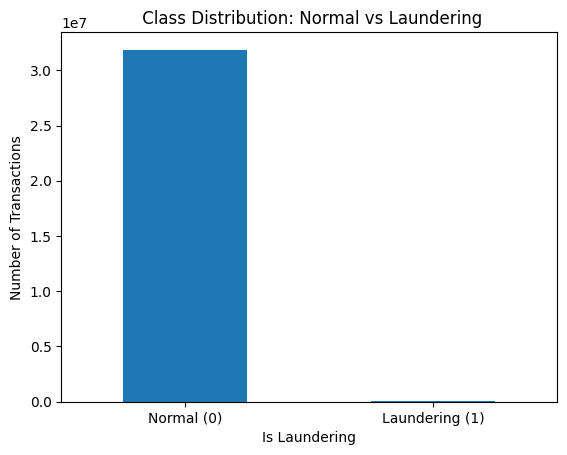

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts.plot(kind='bar')
plt.xticks([0,1], ['Normal (0)', 'Laundering (1)' ], rotation=0)
plt.ylabel('Number of Transactions')
plt.title(' Class Distribution: Normal vs Laundering')
plt.show()

#### Interpretation

- we highly imbalanced dataset

- `Accuracy as a metric would be misleading`

- We  are prioritize `recall (catching laundering cases) and precision (avoiding false alarms).`

### Decision

For modeling, we’ll need imbalance strategies:

- Resampling: oversample minority (SMOTE) | Undersample majority.

- Algorithmic: tree-based models handle imbalance better (`XGBoost, LightGBM`).

- Evaluation: use precision, recall, F1, ROC-AUC, `not raw accuracy`.

#### Next
- Univariate Analysis


In [23]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

Text(0, 0.5, 'Frequency')

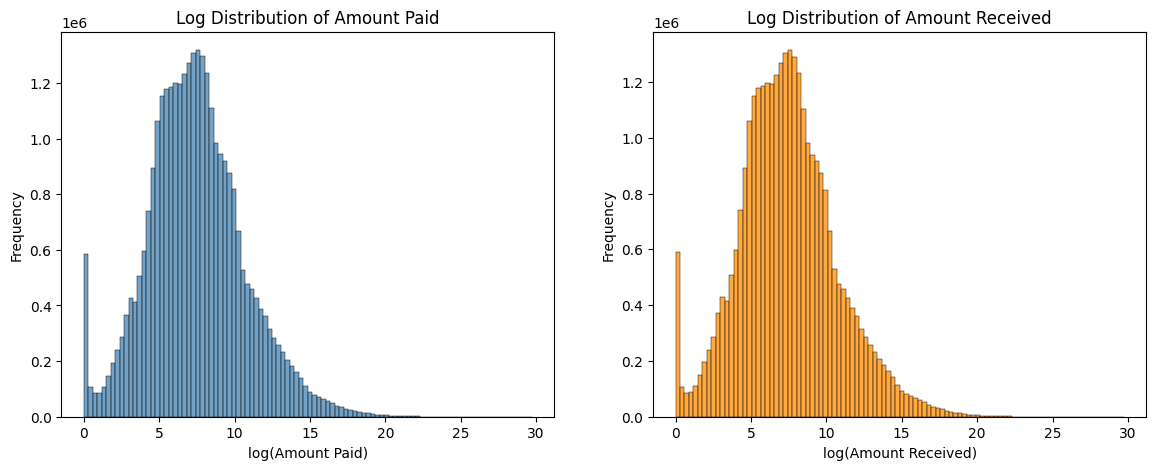

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount Paid
df['log_amount_paid'] = np.log1p(df['Amount Paid'])
sns.histplot(df['log_amount_paid'], bins=100, ax=axes[0], color="steelblue")
axes[0].set_title("Log Distribution of Amount Paid")
axes[0].set_xlabel("log(Amount Paid)")
axes[0].set_ylabel("Frequency")

# Amount Received
df['log_amount_received'] = np.log1p(df['Amount Received'])
sns.histplot(df['log_amount_received'], bins=100, ax=axes[1], color="darkorange")
axes[1].set_title("Log Distribution of Amount Received")
axes[1].set_xlabel("log(Amount Received)")
axes[1].set_ylabel("Frequency")

Bivariate analysis

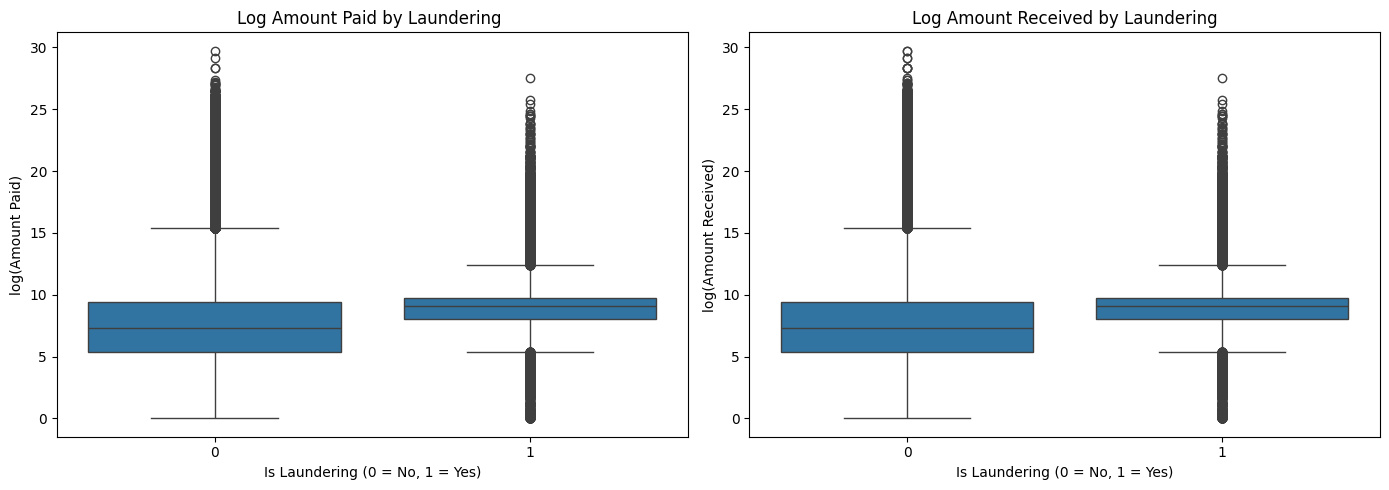

In [28]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount Paid vs Laundering
sns.boxplot(x="Is Laundering", y="log_amount_paid", data=df, ax=axes[0])
axes[0].set_title("Log Amount Paid by Laundering ")
axes[0].set_xlabel("Is Laundering (0 = No, 1 = Yes)")
axes[0].set_ylabel("log(Amount Paid)")

# Amount Received vs Laundering
sns.boxplot(x="Is Laundering", y="log_amount_received", data=df, ax=axes[1])
axes[1].set_title("Log Amount Received by Laundering")
axes[1].set_xlabel("Is Laundering (0 = No, 1 = Yes)")
axes[1].set_ylabel("log(Amount Received)")

plt.tight_layout()
plt.show()

Temporal analysis

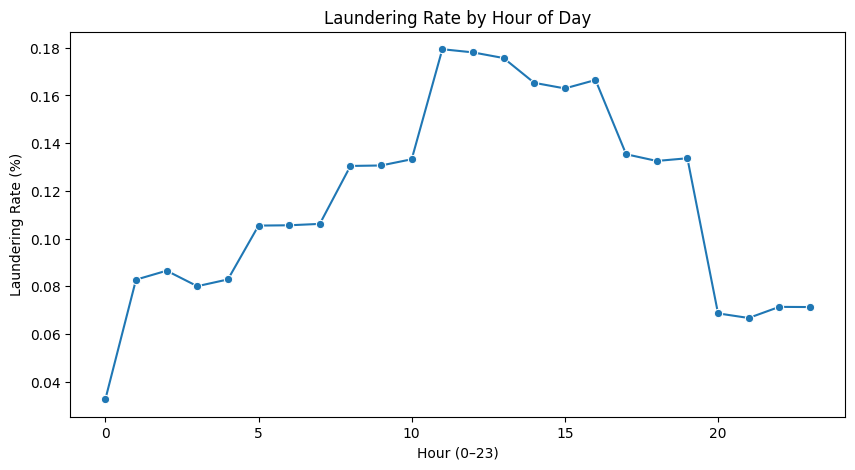

In [27]:
df['hour'] = df['Timestamp'].dt.hour
df['date'] = df['Timestamp'].dt.date
df['month'] = df['Timestamp'].dt.to_period('M')

# hourly laundering rate
hourly = df.groupby('hour')['Is Laundering'].mean() * 100
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly.index, y=hourly.values, marker="o")
plt.title("Laundering Rate by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Laundering Rate (%)")
plt.show()

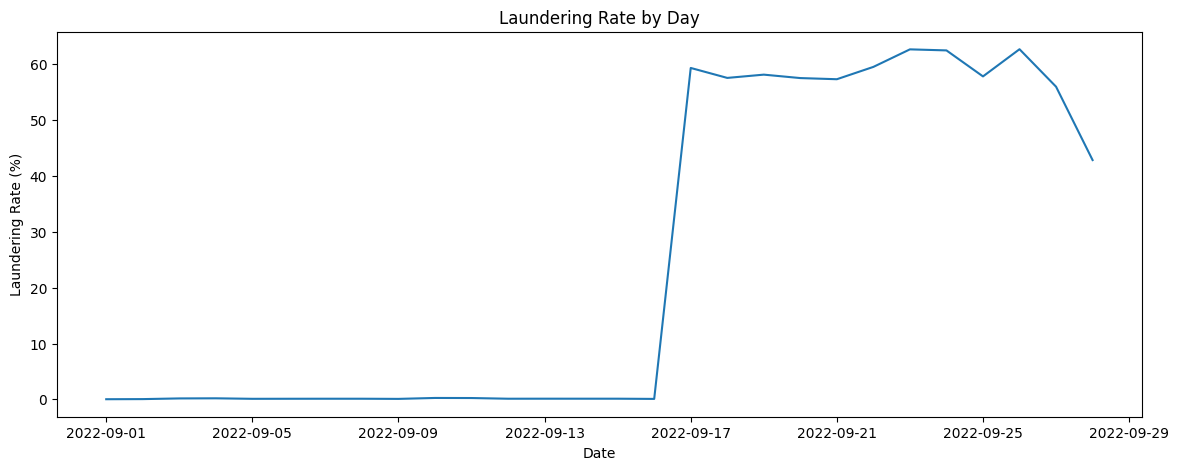

In [29]:
# Daily
daily = df.groupby('date')['Is Laundering'].mean() * 100
plt.figure(figsize=(14, 5))
sns.lineplot(x=daily.index, y=daily.values)
plt.title("Laundering Rate by Day")
plt.xlabel("Date")
plt.ylabel("Laundering Rate (%)")
plt.show()

In [38]:
df['day_of_week'] = df['Timestamp'].dt.dayofweek   # 0 = Monday
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 1 if Sat/Sun

# Frequency of transactions per account per day
txn_freq = df.groupby(['Account', 'date']).size().reset_index(name='daily_txn_count')
df = df.merge(txn_freq, on=['Account', 'date'], how='left')

df[['day_of_week', 'is_weekend', 'daily_txn_count']].head()

,day_of_week,is_weekend,daily_txn_count
0,3,0,7
1,3,0,1
2,3,0,7
3,3,0,13
4,3,0,13


categorical analysis

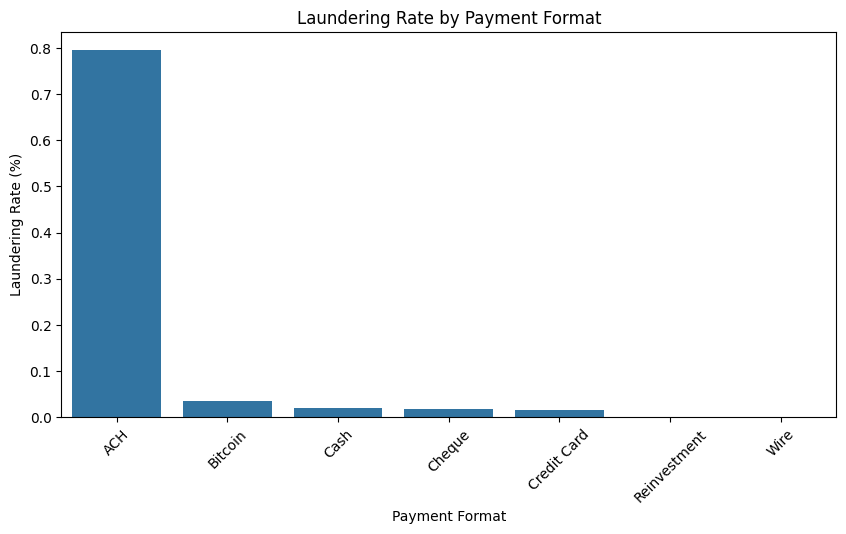

In [32]:
# Laundering rate by Payment Format
fmt_rate = df.groupby('Payment Format')['Is Laundering'].mean() * 100
plt.figure(figsize=(10, 5))
sns.barplot(x=fmt_rate.index, y=fmt_rate.values)
plt.title("Laundering Rate by Payment Format")
plt.xlabel("Payment Format")
plt.ylabel("Laundering Rate (%)")
plt.xticks(rotation=45)
plt.show()

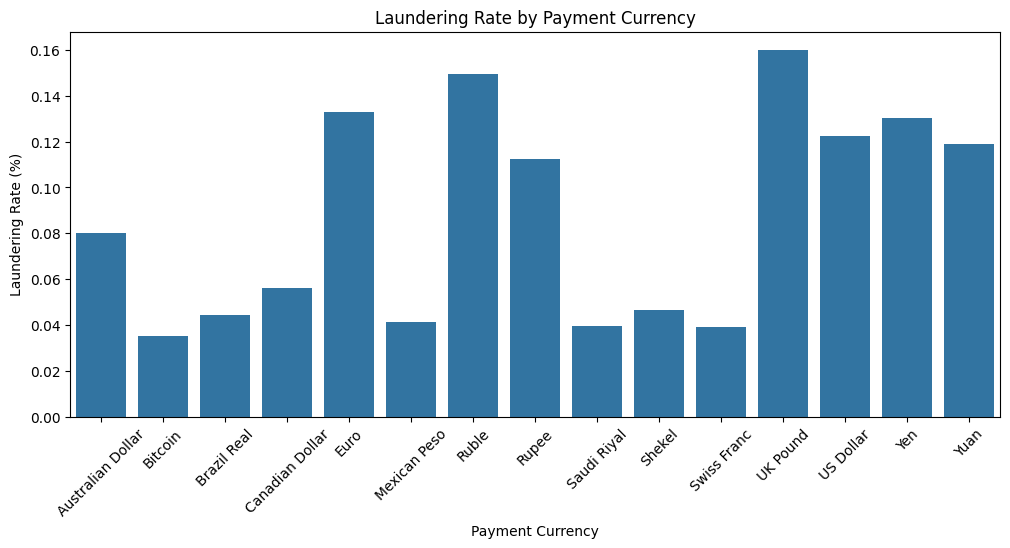

In [35]:


# Laundering rate by Payment Currency
cur_rate = df.groupby('Payment Currency')['Is Laundering'].mean() * 100
plt.figure(figsize=(12, 5))
sns.barplot(x=cur_rate.index, y=cur_rate.values)
plt.title("Laundering Rate by Payment Currency")
plt.xlabel("Payment Currency")
plt.ylabel("Laundering Rate (%)")
plt.xticks(rotation=45)
plt.show()

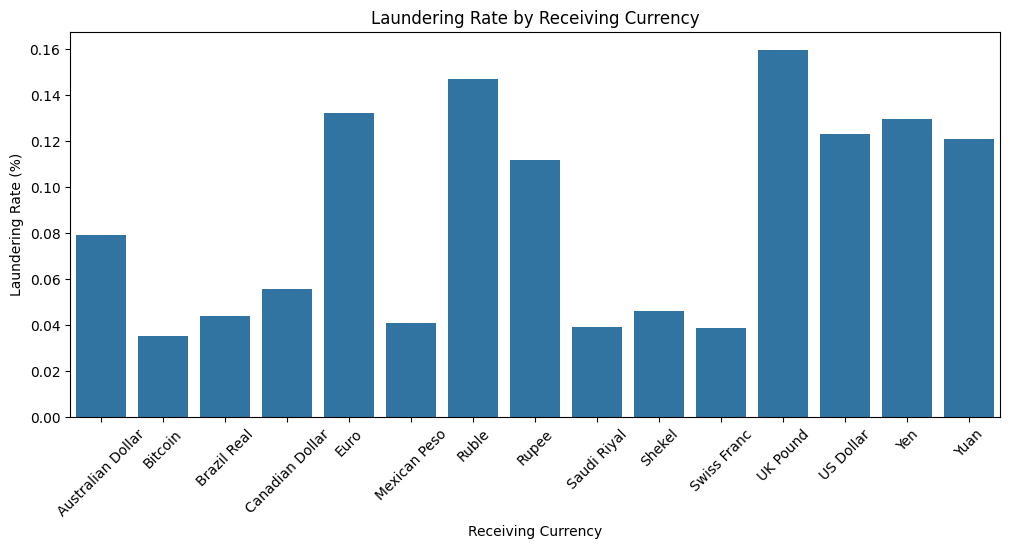

In [36]:
# Laundering rate by Receiving Currency
recv_rate = df.groupby('Receiving Currency')['Is Laundering'].mean() * 100
plt.figure(figsize=(12, 5))
sns.barplot(x=recv_rate.index, y=recv_rate.values)
plt.title("Laundering Rate by Receiving Currency")
plt.xlabel("Receiving Currency")
plt.ylabel("Laundering Rate (%)")
plt.xticks(rotation=45)
plt.show()

Visualizations

#### Insights

##### Daily Transactions & Laundering Rate 
- Transaction counts are high at the start (Sep 1) but drop sharply after Sep 15.
- Laundering rate (%) spikes after Sep 16.

##### Hourly Transactions & Laundering Rat
- Transaction volume is fairly stable across hours.
- Laundering rate is lowest around midnight.
       
#### Interpretation: 
- laundering cases are time clustered during business hours:  possibly reflecting real world operational activity
- Interpretation: could be dataset cutoff or sampling bias (this is not actual real-world data).

 ##### Note for modeling

- Add temporal features:

- day_of_week, hour (business vs non-business hours) and possibly is_weekend



In [39]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering',
       'log_amount_paid', 'log_amount_received', 'hour', 'date', 'month',
       'day_of_week', 'is_weekend', 'daily_txn_count'],
      dtype='object')

In [40]:
# save as parquet
df.to_parquet("../data/Silver/eda_cleaned_HI-Medium_Trans.parquet", index=False)
print("EDA-cleaned dataset saved successfully")


EDA-cleaned dataset saved successfully


In [ ]:
# storage_options = {
#     "client_kwargs": {"region_name": "us-east-1"},
#     "default_block_size": 100 * 1024 * 1024,  
#     "retries": {"max_attempts": 15}
# }
# df.to_parquet(
# "s3://bass-risk-monitoring/Silver/eda_cleaned_HI-Medium_Trans.parquet",
#  engine="pyarrow", 
#  index=False)

# print("saved to s3://bass-risk-monitoring/Silver/eda_cleaned_HI-Medium_Trans.parquet")